In [47]:
import networkx as nx
import pandas as pd
import numpy as np
import timeit
import json
import random
import pickle
import os
import datetime
from Sampling import sample_graph

In [2]:
path = "spotify_million_playlist_dataset/data/"

In [3]:
def share_of_LCC(G):
    LCCs = [len(e) for e in list(nx.connected_components(G))]
    return (max(LCCs)/sum(LCCs), len(LCCs))

In [54]:
def get_modified_at_array(G, print_hist=False):
    playlist_times = []
    for node in G.nodes():
        if type(node) == int:
            playlist_times.append(G.nodes[node]["modified_at"])
    
    ser = pd.Series(playlist_times)
    ser = pd.to_datetime(ser, unit='s')

    if (print_hist==True):
        ser.hist(xrot=90, bins=20)

    return ser

#### Create Graph with n random files

In [4]:
G = sample_graph(verbose=True, path=path)

15/15; time elapsed: 0.0 min 13.3 sec
Time elapsed: 0.0 min  13.269860699999981 sec
n:379489, m:1296126; 


In [5]:
len(G.nodes())

379489

In [6]:
share_of_LCC(G)

(0.9993807462139878, 8)

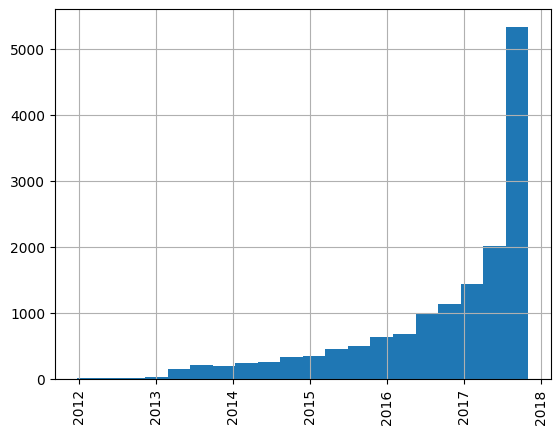

In [55]:
G_ser = get_modified_at_array(G,True)

In [56]:
G_ser.describe()

count                            15000
mean     2016-10-10 07:37:32.160000256
min                2011-12-24 00:00:00
25%                2016-03-28 00:00:00
50%                2017-03-23 00:00:00
75%                2017-09-15 00:00:00
max                2017-11-01 00:00:00
dtype: object

#### Without artists but with albums

In [7]:
H = sample_graph(num_files=15, verbose=True, include_artists=False, path=path)

15/15; time elapsed: 0.0 min 12.1 sec
Time elapsed: 0.0 min  12.134019999999964 sec
n:344003, m:1206744; 


In [8]:
len(H.nodes())

344003

In [9]:
share_of_LCC(H)

(0.9957907343831304, 32)

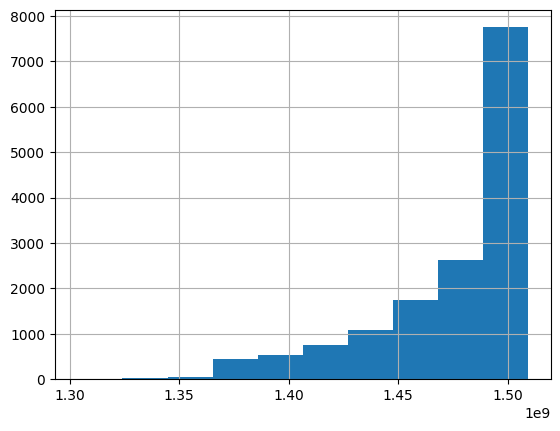

In [31]:
H_ser = get_modified_at_array(H,True)

#### Without artists and albums

In [10]:
I = sample_graph(num_files=15, verbose=True, include_artists=False, include_albums=False, path=path)

15/15; time elapsed: 0.0 min 9.5 sec
Time elapsed: 0.0 min  9.494479700000056 sec
n:237706, m:973982; 


In [11]:
len(I.nodes())

237706

In [12]:
share_of_LCC(I)

(0.9941271991451626, 39)

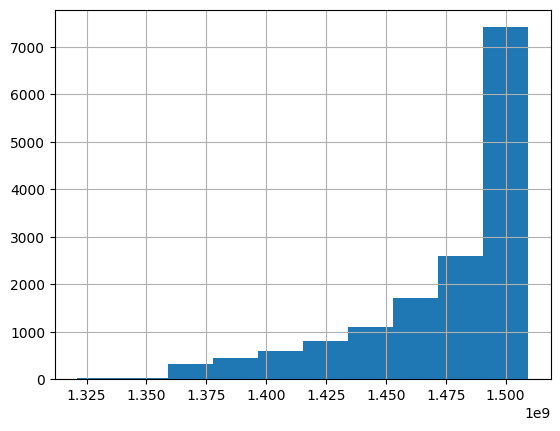

In [32]:
I_ser = get_modified_at_array(I,True)